In [97]:
#Importing the Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing the Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Data Filter Warning Libraries 
import warnings
warnings.filterwarnings('ignore')
#Importing Logging Library 
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)

#Importing Sci-kit Libraries 
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Objective:
# To predict weekly sales for Walmart stores using historical data such as temperature, fuel price, CPI, and holiday flags.
# call the dataset 
url = 'https://raw.githubusercontent.com/gautamrajoriya/Walmart_sales_Analysis/refs/heads/main/WALMART_SALES_ANALYSIS.CSV.csv'
df = pd.read_csv(url)
df.sample(frac= 1) # shuffle the data 


,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4951,35,10/21/2011,"811,328",0.0,59.62,3.570,140.0,8.745
4420,31,8/3/2012,"1,390,175",0.0,91.57,3.417,222.0,6.565
3665,26,10/28/2011,"972,257",0.0,35.06,3.604,136.0,7.598
1728,13,4/30/2010,"1,785,823",0.0,48.33,2.941,126.0,8.107
4147,30,2/5/2010,"465,109",0.0,39.05,2.572,211.0,8.324
...,...,...,...,...,...,...,...,...
4192,30,12/17/2010,"445,332",0.0,48.63,2.869,211.0,8.163
3754,27,10/15/2010,"1,728,388",0.0,58.38,2.999,137.0,8.021
3675,26,1/6/2012,"971,558",0.0,22.94,3.439,137.0,7.467
5288,37,10/12/2012,"521,811",0.0,71.28,3.601,222.0,6.228


In [120]:
# checking information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store_Number      6435 non-null   int64         
 1   Date              6435 non-null   datetime64[ns]
 2   Weekly_Sales      6435 non-null   float64       
 3   Temperature       6435 non-null   float64       
 4   Fuel_Price        6435 non-null   float64       
 5   CPI               6435 non-null   float64       
 6   Unemployment      6435 non-null   float64       
 7   Holiday_Flag_1.0  6435 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


<Axes: >

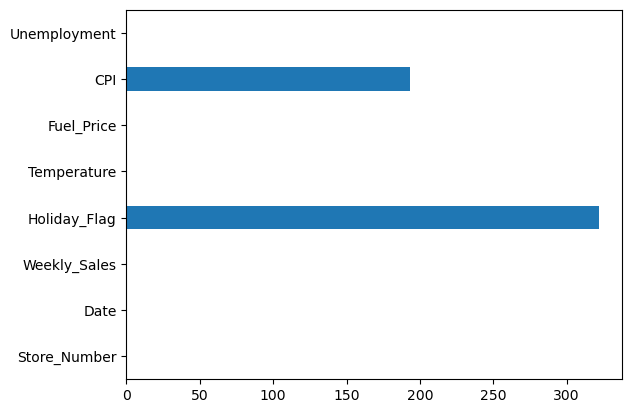

In [100]:
#Checking the null values stats using graphical method
df.isna().sum().plot(kind='barh')

In [101]:
# Checking Missing Value in percentage for every  column present in dataset 
missing_values = df.isnull().sum()/ len(df) * 100
missing_values.sort_values(ascending=False)

Holiday_Flag    5.003885
CPI             2.999223
Store_Number    0.000000
Date            0.000000
Weekly_Sales    0.000000
Temperature     0.000000
Fuel_Price      0.000000
Unemployment    0.000000
dtype: float64

In [102]:
#Evaluate Descriptive Stats: EDA

#Step 1: Segregate Categorical Columns and Numerical Columns

categorical_col = df.select_dtypes(include=object)
numerical_col = df.select_dtypes(include=['int64','float64'])  

In [103]:
#Step2 : Evaluate Descriptive Stats

'''
Step1: Creating a blank list
Step1: Using Ordered Dict Create Dictionary
Step1: append list : stats[]
Step1: Convert appended list into a dataframe

'''

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    categorical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var(),
        'Count':df[i].count()
    })
    stats.append(categorical_stats)
    report = pd.DataFrame(stats)

report



,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance,Count
0,Store_Number,23.000000,23.000,1.000,12.000,34.000,22.000,12.988182,0.000000,-1.201187,45.000,1.000,168.692882,6435
1,Holiday_Flag,0.069688,0.000,0.000,0.000,0.000,0.000,0.254641,3.380870,9.433368,1.000,0.000,0.064842,6113
2,Temperature,60.663782,62.670,50.430,47.460,74.940,27.480,18.444933,-0.336768,-0.612801,100.140,-2.060,340.215549,6435
3,Fuel_Price,3.358607,3.445,3.638,2.933,3.735,0.802,0.459020,-0.096158,-1.177378,4.468,2.472,0.210699,6435
4,CPI,172.061471,183.000,131.000,132.000,213.000,81.000,39.542366,0.072364,-1.826952,237.300,126.000,1563.598688,6242
5,Unemployment,7.999151,7.874,8.099,6.891,8.622,1.731,1.875885,1.188144,2.639712,14.313,3.879,3.518944,6435


In [104]:
# Fix column names
df.columns = df.columns.str.strip()

In [105]:

# Fill missing values
df['CPI'] = df['CPI'].fillna(df['CPI'].median())
df['Holiday_Flag'] = df['Holiday_Flag'].fillna(df['Holiday_Flag'].median())

In [106]:
# 1. Remove commas from 'Weekly_Sales' and convert it to numbers
df['Weekly_Sales'] = df['Weekly_Sales'].str.replace(',', '')  # remove commas
df['Weekly_Sales'] = df['Weekly_Sales'].astype(float)          # convert to float


In [107]:
# 2. Convert 'Date' column to date format
# This allows us to do date-based analysis later if needed
df['Date'] = pd.to_datetime(df['Date'])

In [108]:

df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')
df = pd.get_dummies(df, drop_first=True)


In [109]:
#  Features & Target
X = df.drop(columns=['Date', 'Weekly_Sales'])
y = df['Weekly_Sales']

y.value_counts()


Weekly_Sales
1361945.0    2
1532309.0    2
439133.0     2
457884.0     2
1150663.0    2
            ..
553902.0     1
533162.0     1
527510.0     1
587260.0     1
760281.0     1
Name: count, Length: 6427, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:


# #Split data

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

from imblearn.over_sampling import SMOTE


sc = RobustScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:


from sklearn.ensemble import RandomForestRegressor

RT = RandomForestRegressor().fit(X_train,y_train)
# Prediction values are based on unseen data i.e Test Data
y_pred_RT = RT.predict(X_test)
# y_test : actual value and y_pred_DT : Predicted value 
print('Model Accuracy for Decision tree Regression', r2_score(y_test, y_pred_RT))


Model Accuracy for Decision tree Regression 0.9228239779790224


In [118]:
# Using XgBoost Algorithm

import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor',r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9334037721957219


In [ ]:
# using gradientboosting 

from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gb = GB.predict(X_test)

print('Model Accuracy for GradientBoosting Regressor ',r2_score(y_test,y_pred_gb))

Model Accuracy for GradientBoosting Regressor  0.8750405461605745
